# 1. Work Flow

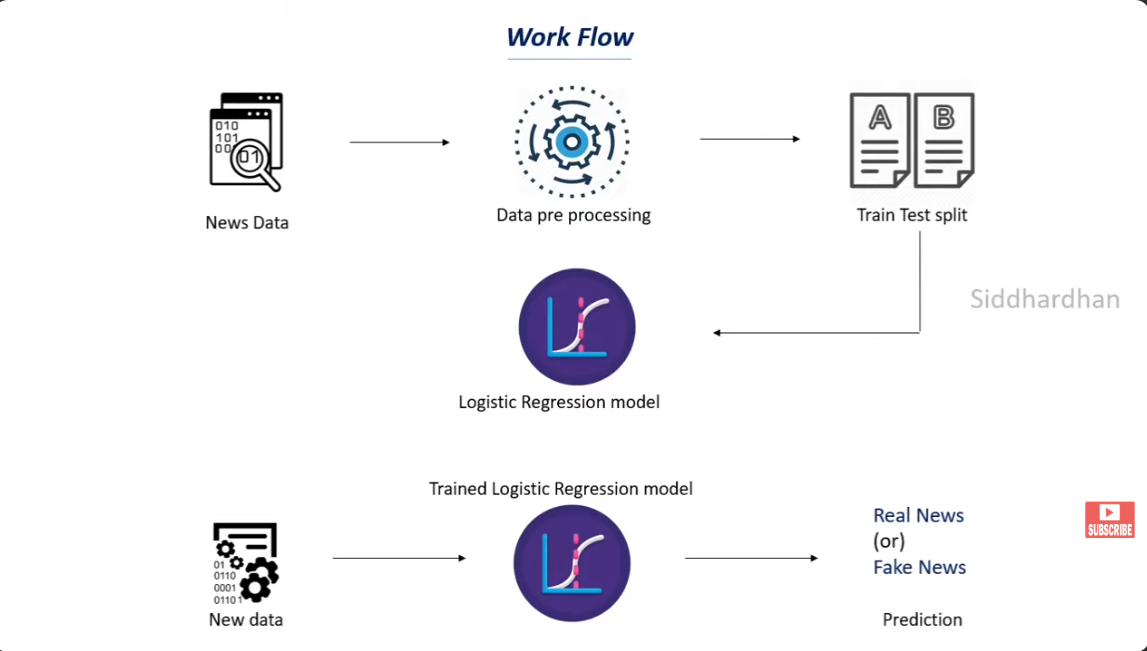

# 2. About Our Data.
1. **id**: Unique ID for a news article.
2. **title**: The title of a news article.
3. **author**: Author of the news article.
4. **text**: The text of the article; could be incomplete.
5. **label**: A label that marks whether the news article is real or fake.


1: Fake News.

0: Real News.

# 3. Importing Dependencies

In [1]:
import numpy as np   # Import NumPy for numerical operations (arrays, matrices, math functions)
import pandas as pd  # Import pandas for data manipulation and handling datasets (DataFrame, CSV, etc.)
import re            # Import regex library for text preprocessing (cleaning special characters, patterns)

from nltk.corpus import stopwords  # Import list of common stopwords (e.g., "the", "is", "and") to remove from text
from nltk.stem.porter import PorterStemmer  # Import PorterStemmer to reduce words to their root form (stemming)

from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text into numerical features using TF-IDF
from sklearn.model_selection import train_test_split         # Split dataset into training and testing sets
from sklearn.linear_model import LogisticRegression          # Import Logistic Regression model for classification
from sklearn.metrics import accuracy_score                   # Calculate accuracy of the model

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Printing the stopwords in English
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

# 4. Data PreProcessing

In [4]:
# Loading the dataset to a pandas DataFrame
df = pd.read_csv('fake_news.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [5]:
df.shape

(20800, 5)

In [6]:
# Print the first five rows of the dataset
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
# Checking number of missing values in our dataset
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [8]:
# Replacing the null values with empty string
df = df.fillna('')

In [9]:
# Merging the auyhor name and news title
df['content'] = df['author'] + ' ' + df['title']

In [10]:
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [11]:
# Separating the data and label
X = df.drop(columns = 'label', axis = 1)
Y = df['label']

In [12]:
X, Y

(          id                                              title  \
 0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
 1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
 2          2                  Why the Truth Might Get You Fired   
 3          3  15 Civilians Killed In Single US Airstrike Hav...   
 4          4  Iranian woman jailed for fictional unpublished...   
 ...      ...                                                ...   
 20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
 20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
 20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
 20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
 20799  20799                          What Keeps the F-35 Alive   
 
                                           author  \
 0                                  Darrell Lucus   
 1                                Daniel J. Flynn   
 2                     

# 5. Stemming

Stemming is the process of reducing a word to its Root word.

Example: actor, actress, acting --> act

In [13]:
port_stem = PorterStemmer()

In [14]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)  # Remove everything except letters (replace digits, punctuation, etc. with spaces)
    stemmed_content = stemmed_content.lower()            # Convert all text to lowercase for uniformity
    stemmed_content = stemmed_content.split()            # Split the text into individual words (tokenization)
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    # Apply stemming to each word (reduce to root form) and remove common stopwords (like 'the', 'is', 'and')

    stemmed_content = ' '.join(stemmed_content)          # Join the processed words back into a single string
    return stemmed_content                               # Return the cleaned and stemmed text

In [15]:
df['content'] = df['content'].apply(stemming)

In [16]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [17]:
# Separating the data and label
X = df['content'].values
Y = df['label'].values

In [18]:
X, Y

(array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
        'daniel j flynn flynn hillari clinton big woman campu breitbart',
        'consortiumnew com truth might get fire', ...,
        'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
        'alex ansari nato russia hold parallel exercis balkan',
        'david swanson keep f aliv'], dtype=object),
 array([1, 0, 1, ..., 0, 1, 1]))

In [19]:
Y.shape

(20800,)

In [20]:
# Converting the textual data into numerical data

vectorizer = TfidfVectorizer()      # Create a TF-IDF vectorizer object to convert text into numerical feature vectors
vectorizer.fit(X)                   # Learn the vocabulary and IDF values from the dataset X (training text data)
X = vectorizer.transform(X)         # Transform the text data X into a sparse matrix of TF-IDF numerical features

In [21]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210687 stored elements and shape (20800, 17128)>
  Coords	Values
  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (2079

# 6. Splitting the dataset to training and test data

In [22]:
# Splitting our data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

# 7. Training Our Model: Logistic Regression

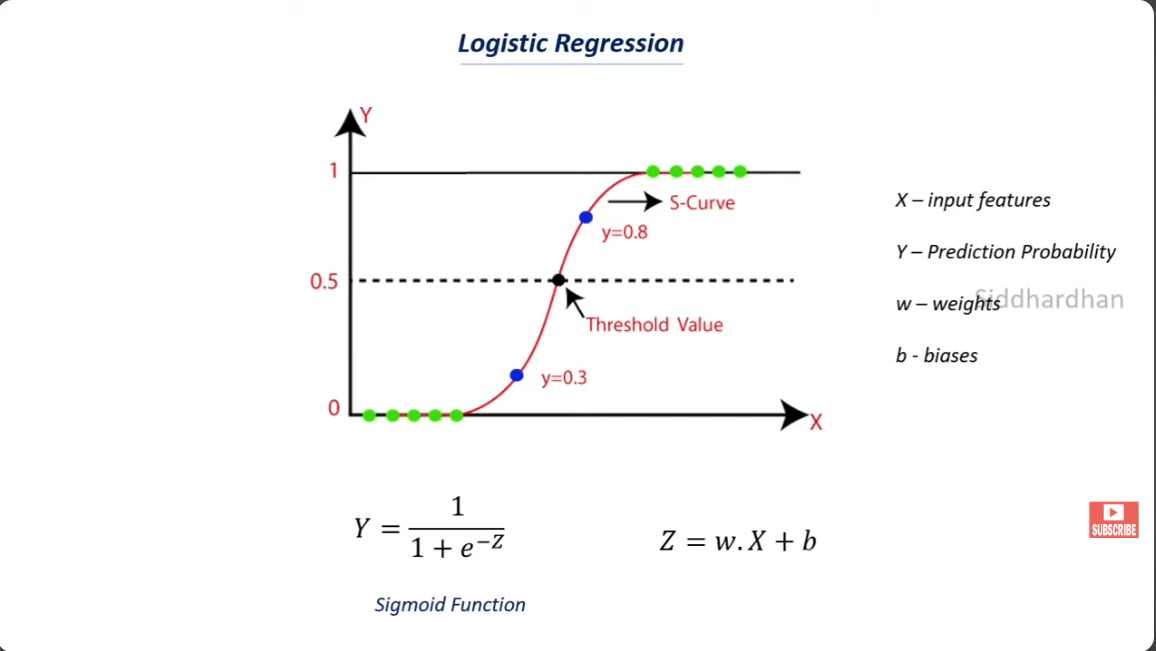

In [23]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

# 8. Evaluation


Accuracy Score

In [24]:
# Accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [25]:
print(f'Accuracy on training data : {training_data_accuracy * 100:.2f}%')

Accuracy on training data : 98.64%


In [28]:
# Accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print(f'Accuracy on test data : {test_data_accuracy * 100:.2f}%')

Accuracy on test data : 97.91%


# 9. Making a predictive system

In [36]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print('The news is Real')
else:
    print('The news is fake')

[0]
The news is Real


In [37]:
print(Y_test[3])

0
